In [46]:
#importing required models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

#read dataframe
df = pd.read_csv("IRIS.csv")

#target and input variable selection
X, y = df.iloc[:,:-1].values, df.iloc[:, -1].values

#do train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Standardizing the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

#creating model with random value of K
knn = KNeighborsClassifier(n_neighbors=25)
model= knn.fit(X_train_scaled, y_train)

#making prediction
pred = model.predict(X_test_scaled)

#checking accuracy of model
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



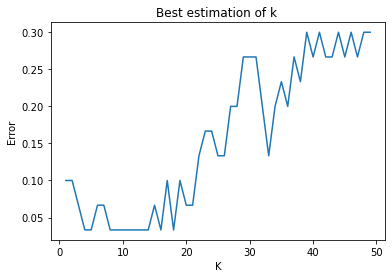

In [44]:
import matplotlib.pyplot as plt
error = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    model= knn.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    error.append(np.mean(pred != y_test))
                         
#plotting graph of error vs value of k                         
plt.plot(range(1, 50), error)
plt.xlabel("K")
plt.ylabel("Error")
plt.title("Best estimation of k ")
plt.show()